In [1]:
%matplotlib inline
import numpy as np
import math
from matplotlib import pyplot as plt

## 1D Gradient Descent

1) Let us consider the function
$$ f(x) = (x-2)^2 + 1 $$
First plot it.

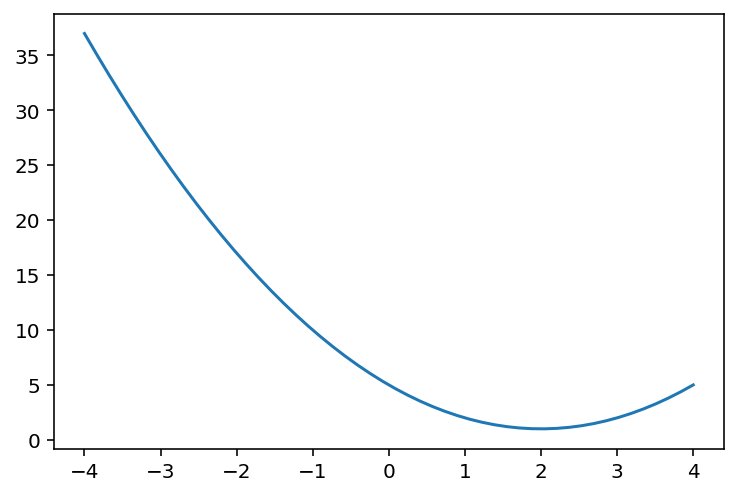

In [2]:
def f(x):
    return (x-2)**2 + 1
xs = np.linspace(-4, 4)
plt.plot(xs, f(xs))

2) If we start at $x=4$, which way should we move and why?

3)If the step size is constants = 1.1, what does the update rule look like?

$$x_{n+1} = \ldots$$

4)Let try it with step size = 1.1. For 10 iteration. Print and plot your point as you go. Can you understand the behavior?

2.9
1.7999999999999998
2.9
1.7999999999999998
2.9
1.7999999999999998
2.9
1.7999999999999998
2.9
1.7999999999999998


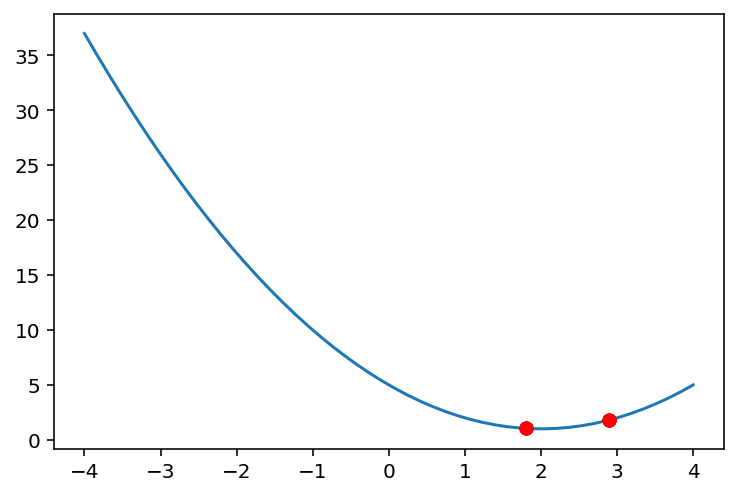

In [5]:
def grad(f, x0, n, h, step_size):
    guess = x0
    guesses = []
    for i in range(n):
        fp = (f(guess+h) - f(guess-h))/(2*h)
        guess = guess - step_size*fp/abs(fp)
        print(guess)
        guesses.append(guess)
    return guess, np.array(guesses)

guess, guesses = grad(f, x0=4.0, n=10, h=0.0001, step_size=1.1)

plt.plot(xs, f(xs))
plt.plot(guesses, f(guesses), 'or')

5)Now let's try step size=0.01 for 100 iteration. Print and plot your point as you go. Can you understand the behavior?

3.99
3.9800000000000004
3.9700000000000006
3.960000000000001
3.950000000000001
3.9400000000000013
3.9300000000000015
3.9200000000000017
3.910000000000002
3.900000000000002
3.8900000000000023
3.8800000000000026
3.8700000000000028
3.860000000000003
3.850000000000003
3.8400000000000034
3.8300000000000036
3.820000000000004
3.810000000000004
3.8000000000000043
3.7900000000000045
3.7800000000000047
3.770000000000005
3.760000000000005
3.7500000000000053
3.7400000000000055
3.7300000000000058
3.720000000000006
3.710000000000006
3.7000000000000064
3.6900000000000066
3.680000000000007
3.670000000000007
3.6600000000000072
3.6500000000000075
3.6400000000000077
3.630000000000008
3.620000000000008
3.6100000000000083
3.6000000000000085
3.5900000000000087
3.580000000000009
3.570000000000009
3.5600000000000094
3.5500000000000096
3.54000000000001
3.53000000000001
3.5200000000000102
3.5100000000000104
3.5000000000000107
3.490000000000011
3.480000000000011
3.4700000000000113
3.4600000000000115
3.4500000000

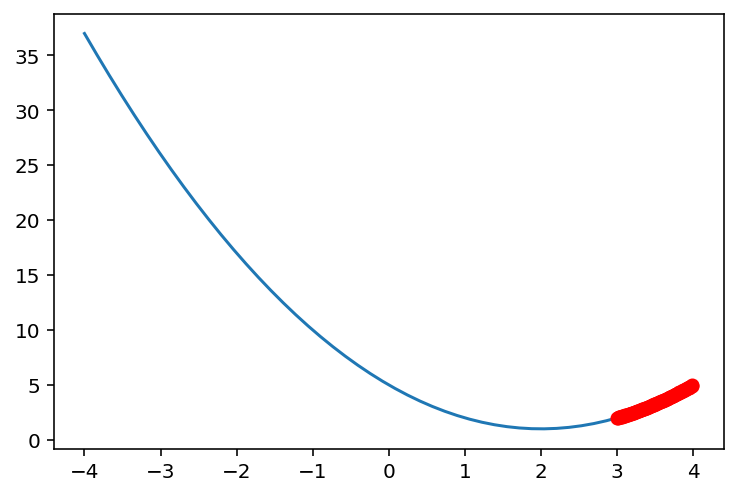

In [7]:
guess, guesses = grad(f, x0=4.0, n=100, h=0.0001, step_size=0.01)

plt.plot(xs, f(xs))
plt.plot(guesses, f(guesses), 'or')

6) When do we want the step size to be small and when do you want the step size to be big?

7) What function kind of does that?

8)If we use that function, what does the update rule looks like.

In [13]:
def grad(f, x0, n, h, lmd):
    guess = x0
    guesses = []
    for i in range(n):
        fp = (f(guess+h) - f(guess-h))/(2*h)
        guess = guess - lmd*fp
        guesses.append(guess)
        print(f(guess))
    return guess, np.array(guesses)

9) Try it with $\lambda=0.1$. Print and Plot to see what happens?

3.600000000000044
3.279999999999502
3.023999999999024
2.819199999998908
2.6553599999987707
2.5242879999988164
2.4194303999988085
2.3355443199988244
2.2684354559989703
2.214748364799065
2.1717986918391405
2.13743895347129
2.1099511627770093
2.0879609302215627
2.0703687441773164
2.056294995341764
2.0450359962733664
2.0360287970186928
2.028823037614865
2.0230584300918695
2.018446744073473
2.0147573952588003
2.0118059162069732
2.0094447329654894
2.0075557863723468
2.0060446290979215
2.004835703278359
2.003868562622687
2.0030948500980825
2.002475880078399
2.0019807040627633
2.001584563250277
2.0012676506002656
2.0010141204802565
2.0008112963841826
2.000649037107279
2.0005192296858008
2.000415383748618
2.0003323069989163
2.0002658455990883
2.0002126764792036
2.0001701411833626
2.0001361129466897
2.000108890357396
2.0000871122859385
2.000069689828684
2.0000557518629023
2.000044601490277
2.0000356811922213
2.0000285449537323
2.0000228359628967
2.0000182687702726
2.0000146150161955
2.0000116920

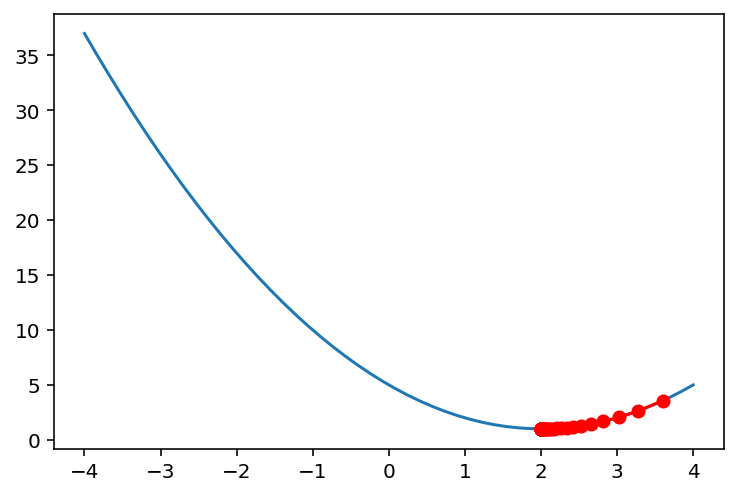

In [10]:
guess, guesses = grad(f, x0=4.0, n=100, h=0.0001, lmd=0.1)

plt.plot(xs, f(xs))
plt.plot(guesses, f(guesses), 'o-r')

10) Try it with $\lambda = 1.1$. For 4 iterations. Can you see how it goes?

-0.3999999999995154
4.87999999999111
-1.4559999999663775
6.14719999993962
-2.976639999888956
7.971967999838899
-5.166361599795449
10.599633919734504
-8.319560703623278
14.38347284429664
-12.86016741311347
19.83220089571613
-19.398641075004445
27.678369289797725
-28.8140431473396
38.97685177697507
-42.37222213520387
55.24666656641398
-61.895999882030324
78.67519986360615
-90.0102398421625
112.41228781876613
-130.49474539035532
160.9936944765975
-188.79243339175832
230.9509200582723
-272.74110408176443
331.68932480624403
-393.6271895712383
476.75262716951306
-567.7031523431326
685.6437826878716
-818.3725389011347
986.447045981218
-1179.3364547250933
1419.6037450980255
-1699.124493409149
2043.3493917750054
-2447.619268909297
2941.5431341564145
-3525.451767962627
4234.942141216048
-5077.530578483096
6097.436717938432
-7312.5240623543195
8779.42893956209
-10530.914564389936
12641.497279744399
-15165.396441478482
18202.875401120433
-21839.051072258702
26211.261744838015
-31449.114684719792
3

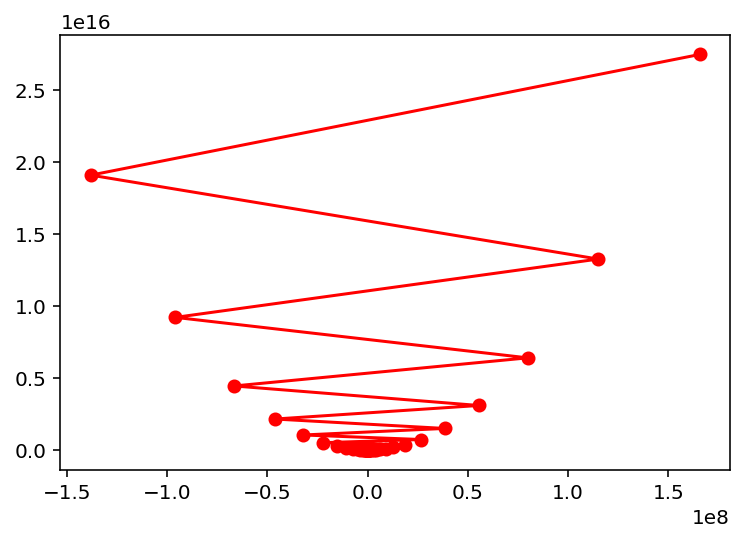

In [11]:
guess, guesses = grad(f, x0=4.0, n=100, h=0.0001, lmd=1.1)

plt.plot(xs, f(xs))
plt.plot(guesses, f(guesses), 'o-r')

0.7624065244690903
0.7243490466467905
0.6869537614258373
0.6503103182729384
0.6145033120511761
0.5796113953907412
0.5457064887882954
0.5128531058747458
0.48110780773463907
0.45051879613404505
0.42112565117879547
0.39295921451624855
0.366041614907211
0.34038642902420524
0.31599896684161843
0.29287666810504537
0.27100959417041426
0.25038099804395936
0.23096795472231707
0.21274203388576668
0.19566999756638004
0.17971450651148227
0.16483482046798276
0.15098747942176732
0.1381269548243775
0.12620626192009932
0.11517752635726215
0.10499250025771083
0.09560302475651859
0.08696143767964133
0.07902092646131575
0.07173582761088394
0.06506187501262746
0.058956400095255976
0.05337848745221033
0.04828908985234016
0.04365110677614997
0.039429430669268906
0.03559096504914551
0.032104618454944285
0.028941278016781993
0.026073766158866755
0.02347678365762065
0.021126841965776237
0.019002187397866285
0.017082719461049837
0.015349905315149823
0.013786692061746427
0.012377418298591115
0.011107726134040768

(1.3657290675666469e-21, 0.7390851331930792)

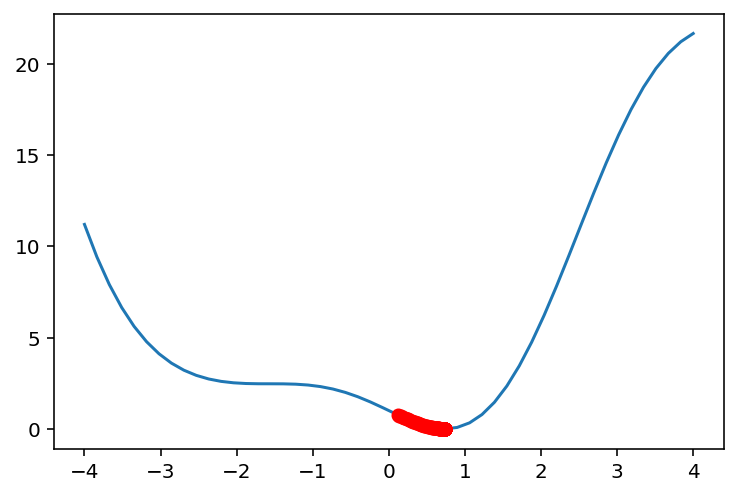

In [25]:
def f(x):
    return (np.cos(x) - x)**2

guess, guesses = grad(f, x0=0.1, n=1000, h=0.00001, lmd=0.01)

plt.plot(xs, f(xs))
plt.plot(guesses, f(guesses), 'o-r')

f(guess), guess

### Multi-Dimension Gradient Descent

1) Let us consider the function.
$$f(x,y) = (x-2)^2 + xy + y^2 + 1$$
Make the 3D plot.

Text(0.5, 0.92, 'f(x,y)')

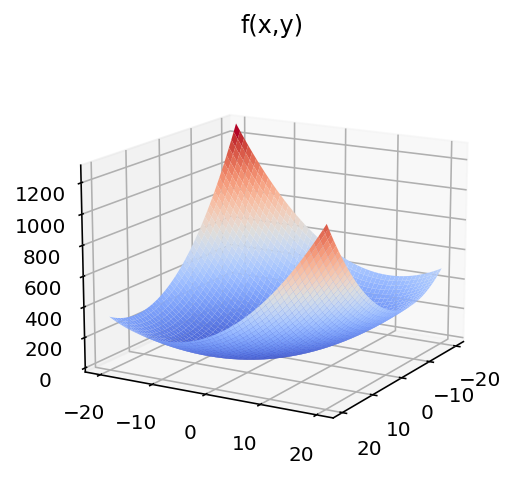

In [26]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
#see matplotlib3d surface
def f(x,y):
    return (x-2)**2+x*y+y**2+1
nx = 200
ny = 200
x = np.linspace(-20,20,nx)
y = np.linspace(-20,20,ny)
xgrid, ygrid = np.meshgrid(x, y)
#print ygrid
uz = np.zeros((nx,ny))
for ix in range(nx):
    for iy in range(ny):
        xx = x[ix]
        yy = y[iy]
        uz[iy,ix] = f(xx,yy) ##<<<<<<This is not a typo: [iy,ix]
        
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.gca().view_init(elev=15., azim=30)
ucs = ax.plot_surface(xgrid, ygrid, uz, cmap=cm.coolwarm)
plt.title('f(x,y)')

2) Plot the contour.

Text(0.5, 1.0, 'f(x,y)')

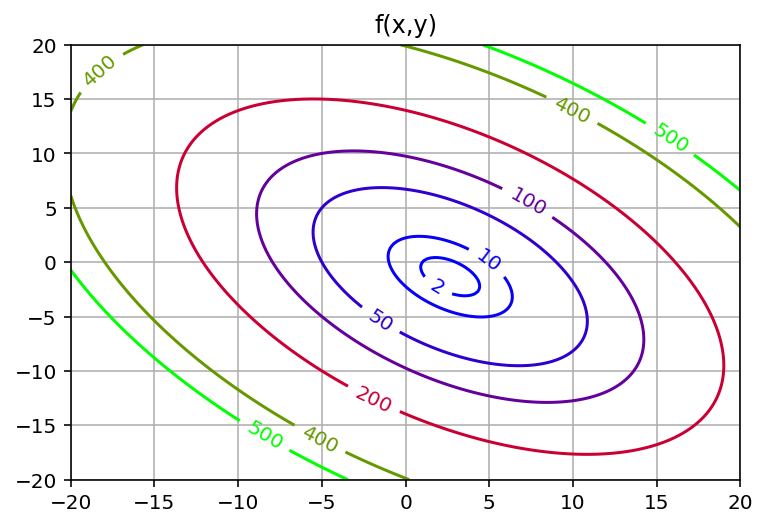

In [27]:
from matplotlib import cm
#see http://matplotlib.org/examples/pylab_examples/contour_demo.html
def f(x,y):
    return (x-2)**2+x*y+y**2+1

nx = 200
ny = 200
x = np.linspace(-20,20,nx)
y = np.linspace(-20,20,ny)
xgrid, ygrid = np.meshgrid(x, y)
#print ygrid
uz = np.zeros((nx,ny))

for ix in range(nx):
    for iy in range(ny):
        xx = x[ix]
        yy = y[iy]
        uz[iy,ix] = f(xx,yy) ##<<<<<<This is not a typo: [iy,ix]

ucs = plt.contour(x, y, uz, [2,10,50,100,200,400,500], cmap=cm.brg)
plt.clabel(ucs, inline=1, fontsize=10)
plt.grid()
plt.title('f(x,y)')

3)Where do you think the minimum is?

4)What is the gradient at (10,-15)? Use plt.arrow to plot arrow.

5) If we want to minimize the function which way should we go? Find the unit vector in that direction.

6) What should your update rule look like? Use vector addition.

7) Use what we learn in 1D. How far should we go? What should the update rule really look like?

8) Use $\lambda = 0.1$ and see where the points go

In [33]:
def f(r):
    x, y = r
    return (x-2)**2+x*y+y**2+1
    
def gradient(f, r, h):
    dx = (f(r+[h, 0]) - f(r-[h, 0]))/2/h
    dy = (f(r+[0, h]) - f(r-[0, h]))/2/h
    return np.array([dx, dy])

def grad(f, r0, lmd, n, h):
    r = r0.copy()
    guesses = []
    for i in range(n):
        r = r - lmd * gradient(f, r, h)
        guesses.append(r.copy())
    return r, guesses


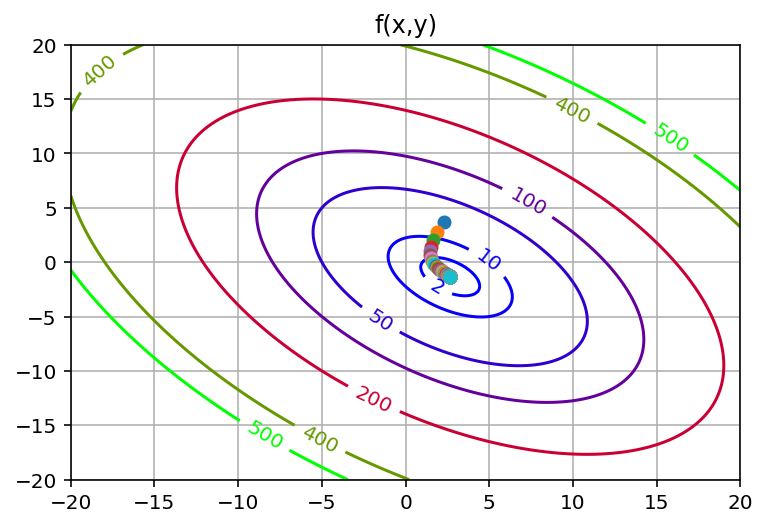

In [34]:
r, guesses = grad(f, np.array([3., 5.]), 0.1, 100, h=0.01)

from matplotlib import cm
#see http://matplotlib.org/examples/pylab_examples/contour_demo.html
def f(x,y):
    return (x-2)**2+x*y+y**2+1

nx = 200
ny = 200
x = np.linspace(-20,20,nx)
y = np.linspace(-20,20,ny)
xgrid, ygrid = np.meshgrid(x, y)
#print ygrid
uz = np.zeros((nx,ny))

for ix in range(nx):
    for iy in range(ny):
        xx = x[ix]
        yy = y[iy]
        uz[iy,ix] = f(xx,yy) ##<<<<<<This is not a typo: [iy,ix]

ucs = plt.contour(x, y, uz, [2,10,50,100,200,400,500], cmap=cm.brg)
plt.clabel(ucs, inline=1, fontsize=10)
plt.grid()
plt.title('f(x,y)')

for guess in guesses:
    x, y = guess
    plt.plot(x, y, 'o')

### Linear Regression Revisited

Let us consider the problem of findind a line that pass through the points.

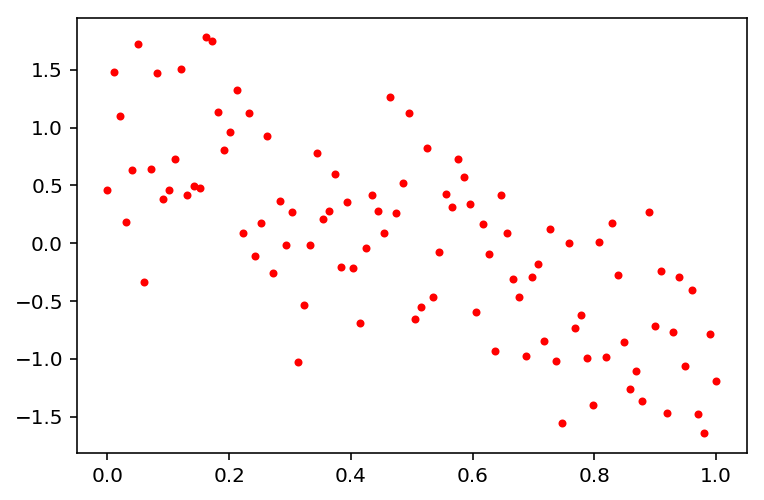

In [5]:
np.random.seed(123)
n = 100
dx = np.linspace(0,1,n)
dy = -2*dx + 1 + np.random.randn(n)/2
plt.plot(dx,dy,'.r')

1) What exactly are we trying to minimize and why?

2) Minimize and Visualize it.

### Separating Line.

We want to draw a separating line betwen two datasets shown below.

In [6]:
np.random.seed(234)
n1 = 100
n2 = 100
mean = [0, 0]
cov = [[1, -0.5], [-0.5, 1]]
r1, r2 = np.random.multivariate_normal(mean, cov, n1).T
#plt.plot(r1, r2, '.r')

mean = [2, 2]
cov = [[1, 0], [0, 1]]
b1, b2 = np.random.multivariate_normal(mean, cov, n2).T
#plt.plot(b1, b2, '.b')

c = np.zeros(n1+n2)
c[:n1] = 1.
c[n1:] = 0.
#print c

d = np.zeros((n1+n2,2))
d[:n1,0] = r1
d[:n1,1] = r2
d[n1:,0] = b1
d[n1:,1] = b2

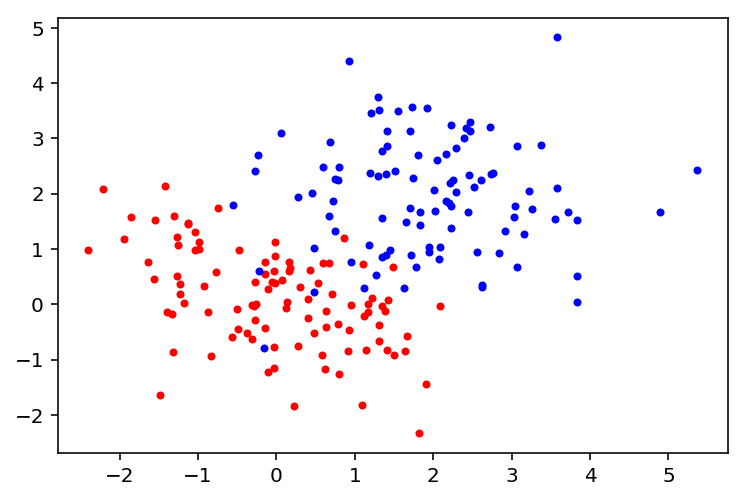

In [7]:
plt.plot(d[c==1,0], d[c==1,1],'.r')#note boolean indexing
plt.plot(d[c==0,0], d[c==0,1],'.b')#note boolean indexing

1) How can we model this as a optimization problem?